In [29]:
import pandas as p
train=p.read_csv("736project data.tsv", delimiter='\t')
YS = train.loc[train['Bottle'] == 0]
YS_sentiment = YS['Sentiment'].values
YS_review = YS['Review'].values
Y12 = train.loc[train['Bottle'] == 1]
Y12_Pos = Y12.loc[Y12['Sentiment'] ==0]
Y12_Pos_review = Y12_Pos['Review'].values
Y12_Neg = Y12.loc[Y12['Sentiment'] ==2]
Y12_Neg_review = Y12_Neg['Review'].values
NB = train.loc[train['Bottle'] == 2]
NB_sentiment = NB['Sentiment'].values
NB_review = NB['Review'].values

In [30]:
Y12_Pos = Y12.loc[Y12['Sentiment'] ==0]
Y12_Pos_review = Y12_Pos['Review'].values
Y12_Neg = Y12.loc[Y12['Sentiment'] ==2]
Y12_Neg_review = Y12_Neg['Review'].values

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#  unigram term frequency vectorizer, set minimum document frequency to 5
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=2, stop_words='english')

In [32]:
Y12_Pos_vec = unigram_count_vectorizer.fit_transform(Y12_Pos_review)
Y12_Neg_vec = unigram_count_vectorizer.fit_transform(Y12_Neg_review)

<1x168 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [34]:
print(Y12_Pos_vec[2])

  (0, 51)	1
  (0, 138)	1
  (0, 157)	1
  (0, 10)	1


In [35]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [36]:

import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [37]:
wordcloud = WordCloud().generate(Y12_Pos_review[1])

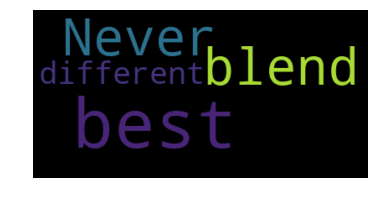

In [38]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [39]:
YS_vec = unigram_count_vectorizer.fit_transform(YS_review)
Y12_vec = unigram_count_vectorizer.fit_transform(Y12_review)
NB_vec = unigram_count_vectorizer.fit_transform(NB_review)

NameError: name 'Y12_review' is not defined

# SVMs Yamazaki Sherry 2016 

## Uni-gram

### feature words

In [40]:
from sklearn.svm import LinearSVC
svm_clf_YS = LinearSVC(C=1)
svm_clf_YS.fit(YS_vec,YS_review)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [41]:
YS_vec

<115x489 sparse matrix of type '<class 'numpy.int64'>'
	with 2035 stored elements in Compressed Sparse Row format>

In [42]:
YS_review

array(["There's not much to say. I've never tasted a whisky like this. To be honest, at first I was skeptical. The nose was familiar, the mouthfeel familiar. The taste familiar. But the finish. Oh. My. God. Not one single whisky I've experienced is even remotely Close to the complexity and longevity of the finish found in this gem. Raisin, chocolate, almond, all working their way from deep at the back of your tongue, and slowly to the front, with a never ending evolution of experience. I count at least 1-2 minutes of altering experiences!I've sadly never owned a bottle, and only experienced it as a single nip. But that nip was heavenly. ",
       "I got a 3cl sample of this and just tried it.  This is so much like Magellan 18 I couldn't believe it!  The Yamazaki 18 is also sherried, but lighter sherry and slightly sweet compared to the Yamazaki Sherry Cask.  The Macallan 18, in comparison, has a deeper sherry flavor, likely due to the fact that it is a true Speyside character to balanc

In [43]:


pos_feature_ranks = sorted(zip(svm_clf_YS.coef_[0], unigram_count_vectorizer.get_feature_names()))
Yamazaki_Sherry_Positive_10 = pos_feature_ranks[-5:]
print("Yamazaki Sherry Cask 2016 positive feature words")
for i in range(0, len(Yamazaki_Sherry_Positive_10)):
    print(Yamazaki_Sherry_Positive_10[i])
    
neu_feature_ranks = sorted(zip(svm_clf_YS.coef_[1], unigram_count_vectorizer.get_feature_names()))
Yamazaki_Sherry_neutral_10 = neu_feature_ranks[-5:]
print("Yamazaki Sherry Cask 2016 neutral feature words")
for i in range(0, len(Yamazaki_Sherry_neutral_10)):
    print(Yamazaki_Sherry_neutral_10[i])
    


neg_feature_ranks = sorted(zip(svm_clf_YS.coef_[2], unigram_count_vectorizer.get_feature_names()))
Yamazaki_Sherry_negative_10 = neg_feature_ranks[-5:]
print("Yamazaki Sherry Cask 2016 negative feature words")
for i in range(0, len(Yamazaki_Sherry_negative_10)):
    print(Yamazaki_Sherry_negative_10[i])


Yamazaki Sherry Cask 2016 positive feature words
(1.734723475976807e-18, 'allocation')
(1.734723475976807e-18, 'purchase')
(1.734723475976807e-18, 'yes')
(0.24256056635334766, 'people')
(0.3576064766389474, 'time')
Yamazaki Sherry Cask 2016 neutral feature words
(0.1352126287063558, 'bars')
(0.1352126287063558, 'enjoy')
(0.1352126287063558, 'hotels')
(0.1352126287063558, 'isn')
(0.21612957545261097, 'getting')
Yamazaki Sherry Cask 2016 negative feature words
(0.08630816395984256, 'bottles')
(0.1377489900079599, 'uk')
(0.23432965878106854, 'allocated')
(0.32110361007845223, 'odds')
(0.46867264746908666, '200')


### sentiment prediction

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(YS_review, YS_sentiment, test_size=0.4, random_state=0)


In [55]:
X_train_vec = unigram_count_vectorizer.fit_transform(X_train)
X_test_vec = unigram_count_vectorizer.transform(X_test)

In [52]:
y_train

array([2, 1, 1, 2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2,
       1, 1, 1])

In [53]:
X_train_vec

<69x312 sparse matrix of type '<class 'numpy.int64'>'
	with 1167 stored elements in Compressed Sparse Row format>

In [46]:
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(C=1)
svm_clf.fit(X_train_vec,y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [47]:
X_train_vec

<69x312 sparse matrix of type '<class 'numpy.int64'>'
	with 1167 stored elements in Compressed Sparse Row format>

In [153]:
svm_clf.score(X_test_vec,y_test)

0.45652173913043476

In [154]:
from sklearn.metrics import confusion_matrix
y_pred = svm_clf.predict(X_test_vec)
cm=confusion_matrix(y_test, y_pred, labels=[0,1,2])
print(cm)
print()
from sklearn.metrics import classification_report
target_names = ['0','1','2']
print(classification_report(y_test, y_pred, target_names=target_names))

[[ 5  6  0]
 [ 5 15  4]
 [ 2  8  1]]

             precision    recall  f1-score   support

          0       0.42      0.45      0.43        11
          1       0.52      0.62      0.57        24
          2       0.20      0.09      0.13        11

avg / total       0.42      0.46      0.43        46



In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Y12_review, Y12_sentiment, test_size=0.4, random_state=0)


X_train_vec = unigram_count_vectorizer.fit_transform(X_train)
X_test_vec = unigram_count_vectorizer.transform(X_test)



In [156]:
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(C=1)
svm_clf.fit(X_train_vec,y_train)





[[27  5  1]
 [ 6  5  1]
 [ 2  1  1]]

             precision    recall  f1-score   support

          0       0.77      0.82      0.79        33
          1       0.45      0.42      0.43        12
          2       0.33      0.25      0.29         4

avg / total       0.66      0.67      0.66        49



In [157]:
svm_clf.score(X_test_vec,y_test)

0.673469387755102

In [158]:
from sklearn.metrics import confusion_matrix
y_pred = svm_clf.predict(X_test_vec)
cm=confusion_matrix(y_test, y_pred, labels=[0,1,2])
print(cm)
print()
from sklearn.metrics import classification_report
target_names = ['0','1','2']
print(classification_report(y_test, y_pred, target_names=target_names))

[[27  5  1]
 [ 6  5  1]
 [ 2  1  1]]

             precision    recall  f1-score   support

          0       0.77      0.82      0.79        33
          1       0.45      0.42      0.43        12
          2       0.33      0.25      0.29         4

avg / total       0.66      0.67      0.66        49



In [140]:

svm_clf_Y12 = LinearSVC(C=1)
svm_clf_Y12.fit(Y12_vec,Y12_review)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [141]:

pos_feature_ranks = sorted(zip(svm_clf_Y12.coef_[0], unigram_count_vectorizer.get_feature_names()))
Yamazaki_12_Positive_10 = pos_feature_ranks[-5:]
print("Yamazaki 12 Year Old positive feature words")
for i in range(0, len(Yamazaki_12_Positive_10)):
    print(Yamazaki_12_Positive_10[i])

neu_feature_ranks = sorted(zip(svm_clf_Y12.coef_[1], unigram_count_vectorizer.get_feature_names()))
Yamazaki_12_Neutral_10 = neu_feature_ranks[-5:]
print("Yamazaki 12 Year Old neutral feature words")
for i in range(0, len(Yamazaki_12_Neutral_10)):
    print(Yamazaki_12_Neutral_10[i])

neg_feature_ranks = sorted(zip(svm_clf_Y12.coef_[2], unigram_count_vectorizer.get_feature_names()))
Yamazaki_12_Negative_10 = neg_feature_ranks[-5:]
print("Yamazaki 12 Year Old negative feature words")
for i in range(0, len(Yamazaki_12_Negative_10)):
    print(Yamazaki_12_Negative_10[i])

Yamazaki 12 Year Old positive feature words
(0.06280043221667303, 'evident')
(0.2952863261647363, 'seconds')
(0.38640505846871975, 'didn')
(0.43515344850158016, 'pungent')
(0.4840857507847187, 'open')
Yamazaki 12 Year Old neutral feature words
(0.3059864641664776, 'lot')
(0.3094776258867953, 'money')
(0.3178123284343278, 'shape')
(0.37471374236790395, 'came')
(0.3800297981873839, 'finish')
Yamazaki 12 Year Old negative feature words
(0.05259038215208521, 'flavors')
(0.06478156551511362, 'months')
(0.07066454719164067, 'comes')
(0.07248993283968633, 'easily')
(0.07248993283968634, 'matured')


In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(NB_review, NB_sentiment, test_size=0.4, random_state=0)


X_train_vec = unigram_count_vectorizer.fit_transform(X_train)
X_test_vec = unigram_count_vectorizer.transform(X_test)


In [161]:
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(C=1)
svm_clf.fit(X_train_vec,y_train)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [162]:
svm_clf.score(X_test_vec,y_test)



0.8166666666666667

In [163]:
from sklearn.metrics import confusion_matrix
y_pred = svm_clf.predict(X_test_vec)
cm=confusion_matrix(y_test, y_pred, labels=[0,1,2])
print(cm)
print()
from sklearn.metrics import classification_report
target_names = ['0','1','2']
print(classification_report(y_test, y_pred, target_names=target_names))

[[45  6  0]
 [ 4  4  0]
 [ 1  0  0]]

             precision    recall  f1-score   support

          0       0.90      0.88      0.89        51
          1       0.40      0.50      0.44         8
          2       0.00      0.00      0.00         1

avg / total       0.82      0.82      0.82        60



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [142]:

svm_clf_NB = LinearSVC(C=1)
svm_clf_NB.fit(NB_vec,NB_review)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [143]:
pos_feature_ranks = sorted(zip(svm_clf_NB.coef_[0], unigram_count_vectorizer.get_feature_names()))
Nikka_Positive_10 = pos_feature_ranks[-5:]
print("Nikka Whisky positive feature words")
for i in range(0, len(Nikka_Positive_10)):
    print(Nikka_Positive_10[i])

neu_feature_ranks = sorted(zip(svm_clf_NB.coef_[1], unigram_count_vectorizer.get_feature_names()))
Nikka_Neutral_10 = neu_feature_ranks[-5:]
print("Nikka Whisky neutral feature words")
for i in range(0, len(Nikka_Neutral_10)):
    print(Nikka_Neutral_10[i])

Nikka Whisky positive feature words
(0.18308020067508085, 'smells')
(0.2010198632435432, 'home')
(0.20692646579043164, 'arrived')
(0.21125172625503663, 'suggest')
(0.21422894556431285, 'work')
Nikka Whisky neutral feature words
(0.056513978081861156, 'nose')
(0.0567976211655845, 'does')
(0.05775221729281895, 'hits')
(0.05937325666312584, 'winter')
(0.0830557167513568, 'spice')
